<a href="https://colab.research.google.com/github/prasanna2019/DemoApp/blob/master/HousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The data for this analysis is taken from https://www.parcllabs.com/. **

In [16]:
pip install pandas geopandas requests schedule matplotlib

In [35]:
import requests
import schedule
import time
import pandas as pd
import matplotlib.pyplot as plt


# Function to update the global variable with new data
def update_data():
    global current_data
    current_data = {
        "start": "2020-01-01",  # Update dates to get recent data
        "end": "2022-01-01",
        "parcl_id": "2900187"
    }
# Function to fetch data using the global state
def fetch_data():
    update_data()  # Update data before making the API call
    url = "https://api.parcllabs.com/v1/market_metrics/"+current_data['parcl_id']+"/housing_event_prices?property_type=ALL_PROPERTIES&start_date="+current_data['start']+"&end_date="+current_data['end']
    headers = {
        'Authorization': '1k4oSrVI6cXl9jY4MOBQsjOtERtA-M4YNitvbgNHfjg'
    }
    try:
      response = requests.get(url, headers=headers)
      data=response.json()
      return data
    except requests.exceptions.RequestException as e:
      print(f"Error during API request: {e}")
      return None

# Schedule the task to run at a fixed interval
'''def schedule_task():
    schedule.every().day.at("00:00").do(fetch_data)

# Run the scheduler
schedule_task()

# Keep the script running
while True:
    schedule.run_pending()
    time.sleep(1) '''

'def schedule_task():\n    schedule.every().day.at("00:00").do(fetch_data)\n\n# Run the scheduler\nschedule_task()\n\n# Keep the script running\nwhile True:\n    schedule.run_pending()\n    time.sleep(1) '

In [36]:
data=fetch_data()

 NOTE: The following code assumes that the 'data' variable contains content fetched from the API after receiving a 200 status. An if condition could be added to verify this, but it has been intentionally omitted here to separate the steps across different cells for clarity.

In [37]:
df = pd.json_normalize(data['items'], sep='_')

In [38]:
df.head()

,date,price_median_sales,price_median_new_listings_for_sale,price_median_new_rental_listings,price_standard_deviation_sales,price_standard_deviation_new_listings_for_sale,price_standard_deviation_new_rental_listings,price_percentile_20th_sales,price_percentile_20th_new_listings_for_sale,price_percentile_20th_new_rental_listings,...,price_per_square_foot_median_new_rental_listings,price_per_square_foot_standard_deviation_sales,price_per_square_foot_standard_deviation_new_listings_for_sale,price_per_square_foot_standard_deviation_new_rental_listings,price_per_square_foot_percentile_20th_sales,price_per_square_foot_percentile_20th_new_listings_for_sale,price_per_square_foot_percentile_20th_new_rental_listings,price_per_square_foot_percentile_80th_sales,price_per_square_foot_percentile_80th_new_listings_for_sale,price_per_square_foot_percentile_80th_new_rental_listings
0,2022-01-01,550000,845000,3085,168633,385311,712,410000,599900,2500,...,3.61,164.45,210.87,2.03,232.14,336.54,2.52,453.39,719.60,5.75
1,2021-12-01,542000,729900,3000,164094,306631,715,405000,529000,2450,...,3.53,162.55,203.19,1.81,230.77,303.69,2.46,449.04,655.87,5.72
2,2021-11-01,530000,799000,3150,157184,353081,845,400000,580000,2500,...,3.81,156.47,208.13,2.07,227.23,327.47,2.50,433.60,705.65,5.92
3,2021-10-01,540000,799000,3050,159742,374033,725,410000,575000,2479,...,3.68,164.18,210.62,2.05,228.85,308.10,2.51,443.71,677.29,5.64
4,2021-09-01,545000,849000,3095,161764,405707,748,410000,599999,2500,...,3.83,159.26,227.44,1.88,229.75,313.31,2.59,438.76,756.08,5.63


In [21]:
df.columns= [col.replace('price_','').replace('price_per_square_foot_','') for col in df.columns]
df.columns

Index(['date', 'median_sales', 'median_new_listings_for_sale',
       'median_new_rental_listings', 'standard_deviation_sales',
       'standard_deviation_new_listings_for_sale',
       'standard_deviation_new_rental_listings', 'percentile_20th_sales',
       'percentile_20th_new_listings_for_sale',
       'percentile_20th_new_rental_listings', 'percentile_80th_sales',
       'percentile_80th_new_listings_for_sale',
       'percentile_80th_new_rental_listings', 'per_square_foot_median_sales',
       'per_square_foot_median_new_listings_for_sale',
       'per_square_foot_median_new_rental_listings',
       'per_square_foot_standard_deviation_sales',
       'per_square_foot_standard_deviation_new_listings_for_sale',
       'per_square_foot_standard_deviation_new_rental_listings',
       'per_square_foot_percentile_20th_sales',
       'per_square_foot_percentile_20th_new_listings_for_sale',
       'per_square_foot_percentile_20th_new_rental_listings',
       'per_square_foot_percentile_80

In [22]:
df.dtypes

,0
date,object
median_sales,int64
median_new_listings_for_sale,int64
median_new_rental_listings,int64
standard_deviation_sales,int64
standard_deviation_new_listings_for_sale,int64
standard_deviation_new_rental_listings,int64
percentile_20th_sales,int64
percentile_20th_new_listings_for_sale,int64
percentile_20th_new_rental_listings,int64


In [23]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 date                                                        0
median_sales                                                0
median_new_listings_for_sale                                0
median_new_rental_listings                                  0
standard_deviation_sales                                    0
standard_deviation_new_listings_for_sale                    0
standard_deviation_new_rental_listings                      0
percentile_20th_sales                                       0
percentile_20th_new_listings_for_sale                       0
percentile_20th_new_rental_listings                         0
percentile_80th_sales                                       0
percentile_80th_new_listings_for_sale                       0
percentile_80th_new_rental_listings                         0
per_square_foot_median_sales                                0
per_square_foot_median_new_listings_for_sale                0
per_square_foot_median_new_rental_listings           

In [24]:
median_sales_value= df['median_sales'].median()
df['median_sales'].fillna(median_sales_value, inplace= True)

<ipython-input-24-aeb24724ff0f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['median_sales'].fillna(median_sales_value, inplace= True)


In [25]:
# Add calculated columns
df['price_diff_sale_list'] = df['median_new_listings_for_sale'] - df['median_sales']

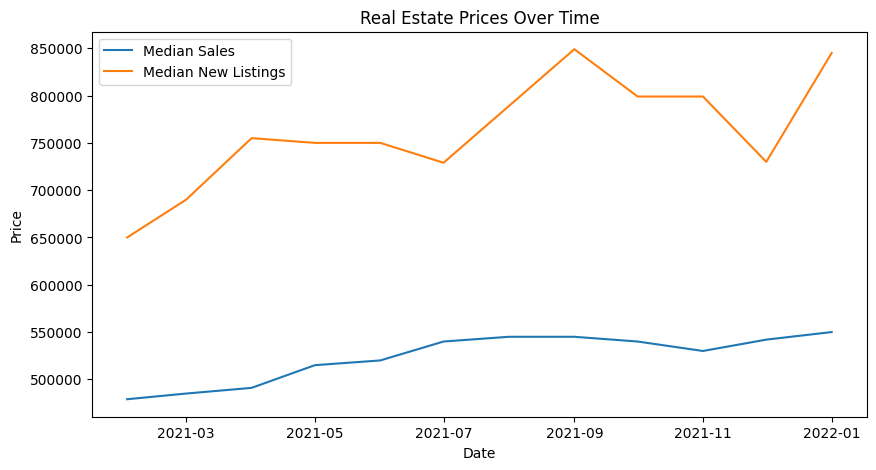

In [26]:
dates = pd.to_datetime(df['date'])
plt.figure(figsize=(10, 5))
plt.plot(dates, df['median_sales'], label='Median Sales')
plt.plot(dates, df['median_new_listings_for_sale'], label='Median New Listings')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Real Estate Prices Over Time')
plt.legend()
plt.show()

In [27]:
# Evaluate Accuracy
std_dev_sales = df['standard_deviation_sales'].mean()
print(f"Average standard deviation in sales: {std_dev_sales}")

Average standard deviation in sales: 157989.41666666666


In [28]:
# Calculate accuracy judgment
if std_dev_sales < 0.2 * df['median_sales'].mean():
    accuracy = "High accuracy"
else:
    accuracy = "Low to moderate accuracy"

print(f"Data Accuracy: {accuracy}")

Data Accuracy: Low to moderate accuracy
